## Problem Set 4

### Mridula Duggal

## Exercise 1

We need to rewrite the sequential formulation oof the model in recursive form. This is possible due to the equivalence between the two forms. The recursive formulation is given by the following, 

$V(k) = max_{k'} u (k^{(1-\theta)} + (1-\delta)k - k') + \beta V(k')$

Since there is no uncertainty in the model and perfect aggregation holds, we know that this model can be reduced to a representative agent model. 

### Part a - Brute force iterations of the value function

Program Executed in 6.5
Number of iterations: 99


Text(0,0.5,'Utility')

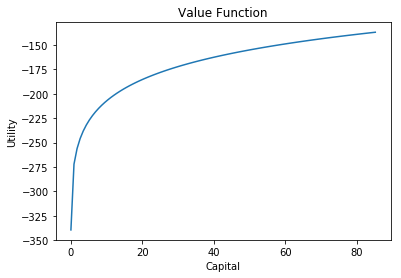

In [4]:
# TRYING TO CHANGE ZIP FOR FOR LOOP

#Import packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
import timeit

#Set the parameters value
beta=0.988   
theta=.679
delta=.013
kappa = 5.24
nu = 2
start = timeit.default_timer()

# STEP 1: DISCRETIZE THE STATE SPACE. 
k_ss=(1/(1-theta)*((1/beta)+delta-1))**(-1/theta)
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 

#STEP 2: Initial guess
#Define a matrix which column vectors are sequential iterations of the value function. 
V = np.empty(shape=[100, 350])
#Guess the initial column vector
V[:,0]=np.zeros((100))


#STEP 3: Feasible return matrix (M).
# Get the grid of all possible combinations of inputs. 
Z1,Z2=np.meshgrid(k,k)

# Feasible combinations
def feasibility(z1,z2):
    return z1**(1-theta) + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N = feasibility(Z1,Z2)

# Feasible utility function
def utility(z1,z2):
    for i in range(100):
        for j in range (100):
                if N[i,j]>=0:
                    return np.log10(z1**(1-theta) + (1-delta)*z1 - z2) - (kappa/(1 + 1/nu))
            
#Define the feasible return matrix
M = utility(Z1,Z2)
M[np.isnan(M)] = -100

#STEP 4: VALUE FUNCTION MATRIX ITERATION
#Notice that since the expectation of the shock is 1, the vector V and W are the same. So we can proceed as before. 
X = np.empty(shape=[100, 100, 2])
G= np.empty(shape=[100, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(100):
        for j in range(100):
                X[i,j]=M[i,j]+(beta*V[:,s][j])        
    for i in range(0,100):
        V[:,s+1][i]= np.amax(X[:,i]) #Iteration
        G[:,s][i]=np.argmax(X[:,i]) # This line stores the policy function at each iteration. 
        for i in range(0,100):
            if abs(V[:,s+1][i]-V[:,s][i])> epsilon:
                continue
            else:
                count +=1
                break

stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec
print('Number of iterations:', count)

#STEP 6: PLOT 
k=np.linspace(0.01,2*k_ss,100)
plt.plot(k,V[:,349])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')

To run value function iteration, we require an initial guess. The initial guess we use is $V^{s}=0$. In accordance, with the contraction mapping theorem we know that no matter what the initial guess is, we will obtain a function as a fixed point provided certain properties are satisfied by the state space. Using, 200 iterations and 100 nodes we find that the loop reaches the fixed point slowly. It takes 99 iterations and 6.5 seconds for the fixed point to be reached. 

### Part b - Value Function Interation taking into account the optimal policy decision.

Program Executed in 8.38
Number of iterations: 99


Text(0,0.5,'Utility')

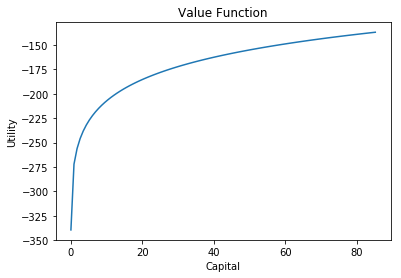

In [5]:
# TRYING TO CHANGE ZIP FOR FOR LOOP

#Import packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
import timeit

#Set the parameters value
beta=0.988   
theta=.679
delta=.013
nu = 2
start = timeit.default_timer()

# STEP 1: DISCRETIZE THE STATE SPACE. 
k_ss=(1/(1-theta)*((1/beta)+delta-1))**(-1/theta)
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 

#STEP 2: Initial guess
#Define a matrix which column vectors are sequential iterations of the value function. 
V = np.empty(shape=[100, 350])
#Guess the initial column vector
V[:,0]=np.zeros((100))


#STEP 3: Feasible return matrix (M).
# Get the grid of all possible combinations of inputs. 
Z1,Z2=np.meshgrid(k,k)

# Feasible combinations
def feasibility(z1,z2):
    return z1**(1-theta) + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N = feasibility(Z1,Z2)

# Feasible utility function
def utility(z1,z2):
    for i in range(100):
        for j in range (100):
                if N[i,j]>=0:
                    return np.log10(z1**(1-theta) + (1-delta)*z1 - z2) - (kappa/(1 + 1/nu))
            
#Define the feasible return matrix
M = utility(Z1,Z2)
M[np.isnan(M)] = -100

#STEP 4: VALUE FUNCTION MATRIX ITERATION
#Notice that since the expectation of the shock is 1, the vector V and W are the same. So we can proceed as before. 
X = np.empty(shape=[100, 100, 2])
G= np.empty(shape=[100, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(100):
        for j in range(100):
            if j >= G[:,s+1][i]:
                X[i,j]=M[i,j]+(beta*V[:,s][j])        
    for i in range(0,100):
        V[:,s+1][i]= np.amax(X[:,i]) #Iteration
        G[:,s][i]=np.argmax(X[:,i]) # This line stores the policy function at each iteration. 
        for i in range(0,100):
            if abs(V[:,s+1][i]-V[:,s][i])> epsilon:
                continue
            else:
                count +=1
                break

stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec
print('Number of iterations:', count)

#STEP 6: PLOT 
k=np.linspace(0.01,2*k_ss,100)
plt.plot(k,V[:,349])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')

To add mononotonicty of the decision rule we use an if statement. Since the policy rule is the argmax, Python only returns the indices of the argmax. Therefore, we use the statement to specify that the value function iteration should only occur if the $k_{j} \geq g^{s}(k_{i})$. We find that the time taken by the algorithm when using monotonicity is significantly greater than the timetaken by brute force even though the number of iterations are the same.  

### Part c - Value Function Iteration taking into account the Concavity of the Value Function

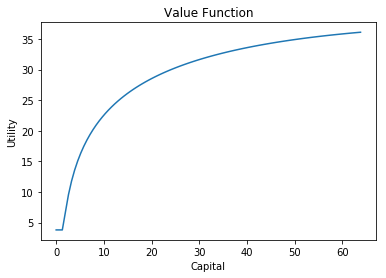

In [18]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
import timeit
start = timeit.default_timer()
#Set the parameters value
beta=0.988   
theta=.679
delta=.013

# STEP 1: DISCRETIZE THE STATE SPACE. 
k_ss=(1/(1-theta)*((1/beta)+delta-1))**(-1/theta)
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 


#STEP 2: Initial guess
#Define a matrix which column vectors are sequential iterations of the value function. 
V = np.empty(shape=[100, 200])
#Guess the initial column vector
V[:,0]=np.zeros((100))


#STEP 3: Feasible return matrix (M).
# Get the grid of all possible combinations of inputs. 
Z1,Z2=np.meshgrid(k,k)

# Feasible combinations
def feasibility(z1,z2):
    return z1**(1-theta) + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N = feasibility(Z1,Z2)

# Feasible utility function
def utility(z1,z2):
    for i,j in zip(range(0,100),range(0,100)):
        if N[i,j]>=0:
            return np.log10(z1**(1-theta) + (1-delta)*z1 - z2)
        else:
            return -100

#Define the feasible return matrix
M = utility(Z1,Z2)
#STORE THE POLICY FUNCTION AT THE END OF EACH ITERATION


#STEP 4': VALUE FUNCTION MATRIX ITERATION
X = np.empty(shape=[100, 100])
for s in range(0,199):
    epsilon=0.01
    for i,j in zip(range(0,100),range(0,100)):
        if X[i, j-1]<X[i,j]:
            X[i,j]=M[i,j]+(beta*V[:,s][j])
            X[np.isnan(X)] = 0 
            for i in range(0,100):
                V[:,s+1][i]= np.amax(X[i,:])
            for k,i in zip(range(0,199),range(0,100)):
                if abs(V[:,s+1][i]-V[:,s][i])< epsilon:
                    break
                else:
                    continue


k1=np.linspace(0.01,1.5*k_ss,100)
plt.plot(k1,V[:,199])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')
#plt.xlim([0,50])
#plt.ylim([0,35])
plt.show()
stop = timeit.default_timer()
execution_time = stop - start
execution_time = round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec

Concavity converges quickly to a fixed point. It does not is significantly faster compared to monotonicity. The time of convergence is very close to the the time taken without concavity and monotonicity.  

### Part d - Value function taking into account local search on the decision rule

Program Executed in 2.28


Text(0,0.5,'Utility')

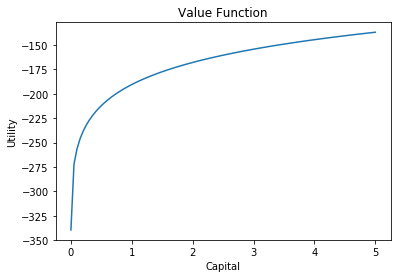

In [17]:
# TRYING TO CHANGE ZIP FOR FOR LOOP

#Import packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
import timeit

#Set the parameters value
beta=0.988   
theta=.679
delta=.013
nu = 2
start = timeit.default_timer()

# STEP 1: DISCRETIZE THE STATE SPACE. 
k_ss=(1/(1-theta)*((1/beta)+delta-1))**(-1/theta)
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 

#STEP 2: Initial guess
#Define a matrix which column vectors are sequential iterations of the value function. 
V = np.empty(shape=[100, 350])
#Guess the initial column vector
V[:,0]=np.zeros((100))


#STEP 3: Feasible return matrix (M).
# Get the grid of all possible combinations of inputs. 
Z1,Z2=np.meshgrid(k,k)

# Feasible combinations
def feasibility(z1,z2):
    return z1**(1-theta) + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N = feasibility(Z1,Z2)

# Feasible utility function
def utility(z1,z2):
    for i in range(100):
        for j in range (100):
                if N[i,j]>=0:
                    return np.log10(z1**(1-theta) + (1-delta)*z1 - z2) - (kappa/(1 + 1/nu))
            
#Define the feasible return matrix
M = utility(Z1,Z2)
M[np.isnan(M)] = -100

#STEP 4: VALUE FUNCTION MATRIX ITERATION
#Notice that since the expectation of the shock is 1, the vector V and W are the same. So we can proceed as before. 
X = np.empty(shape=[100, 100, 2])
G= np.empty(shape=[100, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(100):
        for j in range(100):
            if j == G[:,s+1][i]:
                X[i,j]=M[i,j]+(beta*V[:,s][j])        
    for i in range(0,100):
        V[:,s+1][i]= np.amax(X[:,i]) #Iteration
        G[:,s][i]=np.argmax(X[:,i]) # This line stores the policy function at each iteration. 
        for i in range(0,100):
            if abs(V[:,s+1][i]-V[:,s][i])> epsilon:
                continue
            else:
                count +=1
                break

stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec
#print('Number of iterations:', count)

#STEP 6: PLOT 
k=np.linspace(0,5,100)
plt.plot(k,V[:,349])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')

Changing the search area to between 0 and 3, gives us the same value function. However, the time taken to find the value function is significantly lower when using this method, compared to when using concavity. However, the number of iterations is very high. 

### Part e - Iterations of the value function taking into account both concavity of the value function and monotonicity of the decision rule

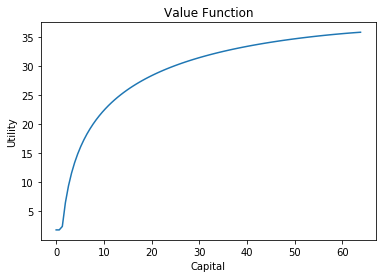

Program Executed in 0.16


In [298]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
import timeit
start = timeit.default_timer()
#Set the parameters value
beta=0.988   
theta=.679
delta=.013

# STEP 1: DISCRETIZE THE STATE SPACE. 
k_ss=(1/(1-theta)*((1/beta)+delta-1))**(-1/theta)
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 


#STEP 2: Initial guess
#Define a matrix which column vectors are sequential iterations of the value function. 
V = np.empty(shape=[100, 200])
#Guess the initial column vector
V[:,0]=np.zeros((100))


#STEP 3: Feasible return matrix (M).
# Get the grid of all possible combinations of inputs. 
Z1,Z2=np.meshgrid(k,k)

# Feasible combinations
def feasibility(z1,z2):
    return z1**(1-theta) + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N = feasibility(Z1,Z2)

# Feasible utility function
def utility(z1,z2):
    for i,j in zip(range(0,100),range(0,100)):
        if N[i,j]>=0:
            return np.log10(z1**(1-theta) + (1-delta)*z1 - z2)
        else:
            return -100

#Define the feasible return matrix
M = utility(Z1,Z2)
#STORE THE POLICY FUNCTION AT THE END OF EACH ITERATION


#STEP 4': VALUE FUNCTION MATRIX ITERATION
V4 = np.empty(shape=[100, 200])
V4[:,0]=np.zeros((100))
G4 = np.empty(shape=[100, 200])
X4 = np.empty(shape=[100, 100]) 
for s in range(0,199):
    epsilon=0.01
    for i,j in zip(range(0,100),range(0,100)):
        if j >= G4[:,s+1][i]: #Condition for Monotonicity
            if X4[i, j]>X4[i,j-1]: #Condition for Concavity
                X4[i,j]=M[i,j]+(beta*V4[:,s][j])
                X4[np.isnan(X4)] = 0 
                for i in range(0,100):
                    V4[:,s+1][i]= np.amax(X4[i,:])
                    G4[:,s]=np.argmax(X4[i,:])
                for i in range(0,100):
                    if abs(V4[:,s+1][i]-V4[:,s][i])> epsilon:
                        continue
                    else:
                        count += 1
                        break

k1=np.linspace(0.01,1.5*k_ss,100)
plt.plot(k1,V4[:,199])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')
#plt.xlim([0,90])
#plt.ylim([0,45])
plt.show()

stop = timeit.default_timer()
execution_time = stop - start
execution_time = round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec

Using monotonicity and concavity together, we find that the time taken by the algorithm to converge to the fixed point decreases significantly compared to using brute force. 

## Redo item 1 adding a labor choice that is continuous. For this, set $ \kappa$ = 5.24 and $\nu$ = 2.0.

Program Executed in 14.34
Number of iterations: 349


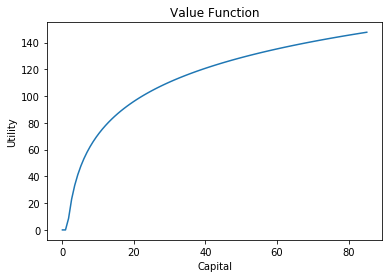

In [18]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import timeit
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Set the parameters value
beta=0.988   
theta=.679
delta=.013
kappa=5.24
nu=2
start = timeit.default_timer()

# STEP 1: DISCRETIZE THE STATE SPACE. 
k_ss=(1/(1-theta)*((1/beta)+delta-1))**(-1/theta)
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 
h=np.linspace(0,1,5)

#STEP 2: Initial guess
#Define a matrix which column vectors are sequential iterations of the value function. 
V = np.empty(shape=[100, 350])
#Guess the initial column vector
V[:,0]=np.zeros((100))


#STEP 3: Feasible return matrix (M).
# Get the grid of all possible combinations of inputs. 
Z1,Z2,H =np.meshgrid(k,k,h)

# Feasible combinations
def feasibility(z1,z2,h):
    return (z1**(1-theta))*(h**theta) + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N = feasibility(Z1,Z2,H)

# Feasible utility function
def utility(z1,z2,h):
       for i in range(100):
            for j in range(100):
                for m in range(5):
                    if N[i,j,m]>=0:
                        return np.log10(z1**(1-theta)*(h**theta) + (1-delta)*z1 - z2) - (kappa/(1+(1/nu)))*(h**(1+(1/nu)))

            
#Define the feasible return matrix
M = utility(Z1,Z2,H)
M[np.isnan(M)] = 0
np.shape(M)

#STEP 4: VALUE FUNCTION MATRIX ITERATION
X = np.empty(shape=[100, 100, 5])
G= np.empty(shape=[100, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(100):
        for j in range (100):
            for m in range (5):
                X[i,j,m]=M[i,j,m]+(beta*V[:,s][j])
    for i in range(100):
        V[:,s+1][i]= np.amax(X[:,i]) #Iteration
        G[:,s][i]=np.argmax(X[:,i]) # This line stores the policy function at each iteration. 
    for i in range(100):
        if abs(V[:,s+1][i]-V[:,s][i])> epsilon:
            continue
        else:
            count +=1
            break
            
stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec

#STEP 6: PLOT 
k=np.linspace(0.01,2*k_ss,100)
plt.plot(k,V[:,349])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')
#plt.xlim([0,90])
#plt.ylim([0,45])
print('Number of iterations:', count)

We find that adding continuous labour increases the time takes the algorithm to find the fixed point. This could be because we are using Python and several nested loops. And for loops in Python take a significantly longer time to run the algorithm. 

### 3 - Redo item 1 using a Chebyshev regression algorithm to approximate the value function. Compare your results.

Program Executed in 0.52
Number of iterations: 300


Text(0.5,1,'Chebyshev approximation')

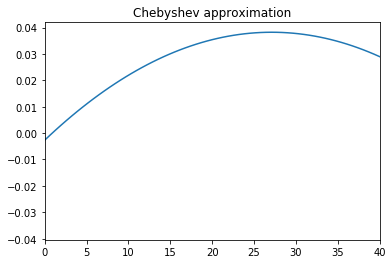

In [80]:
#VFI with Chebyshev regression (we follow Makoto Nakajima notes)
import numpy as np
import matplotlib.pyplot as plt
import timeit
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
#STEP 1: Set the order of polynomials used for approximation.
n=2

#STEP 2: Set the tolerance parameter
epsilon=0.01

#STEP 3: Upper and lower bound of the discrete space state
beta=0.988   
theta=.679
delta=.013
k_ss=(1/(1-theta)*((1/beta)+delta-1))**(-1/theta)
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 

#STEP 4: Compute the collocations nodes. 
# a) Cheby nodes [-1,1]
nodes=[]
for i in range(100):
    q=np.cos((((2*i)-1)/200)*np.pi)
    nodes.append(q)
nodes=np.asarray(nodes)

#b) Adjust the nodes to the [k0,1.5*k_ss] interval:
nod=[]
for i in range(100):
    q=((nodes[i])*((1.5*k_ss - k[0])/2))+ (((1.5*k_ss + k[0])/2))
    nod.append(q)
nod=np.asarray(nod)
    
#STEP 5: Guess for the level of the value function at the points
y0=np.ones(100)

#STEP 5: Get the Chebyshev coefficients
coefficients=np.polynomial.chebyshev.chebfit(nod,y0,n)

#STEP 6: Value function guess
V0=np.polynomial.chebyshev.chebval(k,coefficients)

#STEP 7: Get the policy function
#7.1. Get the feasible return matrix M

Z1,Z2=np.meshgrid(k,k)
def feasibility(z1,z2):
    return z1**(1-theta) + (1-delta)*z1 - z2
N = feasibility(Z1,Z2)
def utility(z1,z2):
    for i in range(0,100):
        for j in range (0,100):
            if N[i,j]>=0:
                return np.log10(z1**(1-theta) + (1-delta)*z1 - z2)
            else:
                return -1000
M = utility(Z1,Z2)

#7.2. Get the policy function
X = np.empty(shape=[100, 100])
G0=np.empty(shape=[100,1])
for i,j in zip(range(0,100),range(0,100)):
    X[i,j]=M[i,j]+(beta*V0[j])
    X[np.isnan(X)] = -1000    
for i in range(0,100):
    G0[i]=np.argmax(X[:,i]) 

#STEP 8: Update the value function
y1=np.empty(shape=[100,1])
for i in range(0,100):
    y1[i]=utility(k[i],G0[i])+(beta*V0[i])
y1[np.isnan(y1)] = 0
y1=np.reshape(y1, (100,))

#STEP 9: New guess for the coefficients
coefficients1=np.polynomial.chebyshev.chebfit(nod,y1,n)


#STEP 10: Compare the coefficients:
d=np.amax(abs(coefficients - coefficients1))

#Since the maximum distance is higher than the tolerance level, we go back to step 6. We need a loop.
start = timeit.default_timer()
count=0
epsilon=0.01
while d>epsilon and count<300:
    V=np.polynomial.chebyshev.chebval(k,coefficients1) #VF guess
    for i,j in zip(range(0,100),range(0,100)): #Return matrix
        X[i,j]=M[i,j]+(beta*V[j])
        X[np.isnan(X)] = -1000     
    for i in range(0,100): #Policy function
        G0[i]=np.argmax(X[i,:]) 
    for i in range(0,100): #Update the value function
        y1[i]=utility(k[i],G0[i])+(beta*V[i])
        y1[np.isnan(y1)] = 0
        y1=np.reshape(y1, (100,))        
    coefficients1=np.polynomial.chebyshev.chebfit(nod,y1,n)
    d=np.amax(abs(coefficients - coefficients1))
    count +=1

stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec
print('Number of iterations:', count)

plt.plot(k,V)
plt.xlim([0,40])
plt.title('Chebyshev approximation')

Using Chebyshev polynomials the time taken by the algorithm is much lower than before. But the number of iterations is 300. The shape of the function is concave. However, it is different from the value function we got before. Nonetheless, we now have positive utility, which was not the case when we were using brute force. 

## Exercise 2

### Part 1 - Add productivity shocks, $z_{t}$, to the previous model

Program Executed in 5.23
Number of iterations: 51


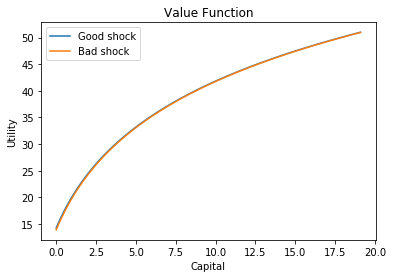

In [26]:
#STOCHASTIC, NO LABOR

#Import packages
import numpy as np
import matplotlib.pyplot as plt
import timeit

#Set the parameters value
beta=0.988   
theta=.679
delta=.013
kappa=5.24
nu=2
start = timeit.default_timer()

# STEP 1: DISCRETIZE THE STATE SPACE. 
#Get the steady state values. h_ss=0.299
k_ss=((1/(1-theta)*((1/beta)+delta-1))**(-1/theta))*0.299
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 
z=[1.01, 1/1.01] #Shock grid

#STEP 2: Initial guess
#Define a matrix which column vectors are sequential iterations of the value function. 
V = np.empty(shape=[200, 350])
#Guess the initial column vector
V[:,0]=np.zeros((200))


#STEP 3: Feasible return matrix (M).
# Get the grid of all possible combinations of inputs. 
K1,K2 =np.meshgrid(k,k)

# Get the submatrix M for z=1.01
# Feasible combinations
def feasibility0(z1,z2):
    return (z1**(1-theta))*1.01 + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N0 = feasibility0(K1,K2)

# Feasible utility function
def utility0(z1,z2):
    for i in range(100):
        for j in range (100):
                if N0[i,j]>=0:
                    return np.log10(z1**(1-theta)*1.01 + (1-delta)*z1 - z2)
            
#Define the feasible return matrix
M0 = utility0(K1,K2)
M0[np.isnan(M0)] = -100

# Get the submatrix M for z=1/1.01
# Feasible combinations
def feasibility1(z1,z2):
    return (z1**(1-theta))*(1/1.01) + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N1 = feasibility1(K1,K2)

# Feasible utility function
def utility1(z1,z2):
    for i in range(100):
        for j in range (100):
                if N1[i,j]>=0:
                    return np.log10(z1**(1-theta)*(1/1.01) + (1-delta)*z1 - z2)
            
#Define the feasible return matrix
M1 = utility1(K1,K2)
M1[np.isnan(M1)] = -100

#Now, stack the two submatrixes to get the stochastic return matrix M. 
M= np.vstack((M0,M1))

#STEP 4: VALUE FUNCTION MATRIX ITERATION
#Notice that since the expectation of the shock is 1, the vector V and W are the same. So we can proceed as before. 
X = np.empty(shape=[200,100])
G= np.empty(shape=[200, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(200):
        for j in range(100):
                X[i,j]=M[i,j]+(beta*V[:,s][i])        
    for i in range(0,200):
        V[:,s+1][i]= np.amax(X[i,:]) #Iteration
        G[:,s][i]=np.argmax(X[i,:]) # This line stores the policy function at each iteration. 
    for i in range(0,200):
        if abs(V[:,s+1][i]-V[:,s][i])> epsilon:
            continue
        else:
            count +=1
            break

stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec
print('Number of iterations:', count)

#STEP 6: PLOT 
k=np.linspace(1.5*k_ss,0.01, 100)
V=V[:,51]
V_good=V[0:100]
V_bad=V[100:200]
plt.plot(k,V_good, label='Good shock')
plt.plot(k,V_bad, label='Bad shock')
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')
plt.legend()

Given the fact that the shocks are not very different from each other. We get converegence in 51 iterations. However, the time taken is much longer. This could be the result of the increased dimensionality, from question 1. 

Program Executed in 5.19
Number of iterations: 320


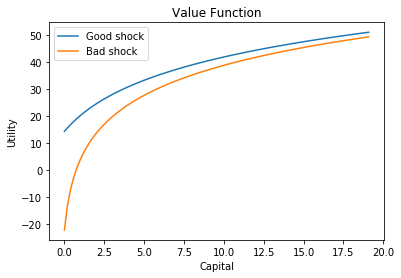

In [27]:
#STOCHASTIC, NO LABOR

#Import packages
import numpy as np
import matplotlib.pyplot as plt
import timeit

#Set the parameters value
beta=0.988   
theta=.679
delta=.013
kappa=5.24
nu=2
start = timeit.default_timer()

# STEP 1: DISCRETIZE THE STATE SPACE. 
#Get the steady state values. h_ss=0.299
k_ss=((1/(1-theta)*((1/beta)+delta-1))**(-1/theta))*0.299
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 
z=[1.01, 1/1.01] #Shock grid

#STEP 2: Initial guess
#Define a matrix which column vectors are sequential iterations of the value function. 
V = np.empty(shape=[200, 350])
#Guess the initial column vector
V[:,0]=np.zeros((200))


#STEP 3: Feasible return matrix (M).
# Get the grid of all possible combinations of inputs. 
K1,K2 =np.meshgrid(k,k)

# Get the submatrix M for z=1.01
# Feasible combinations
def feasibility0(z1,z2):
    return (z1**(1-theta))*1.01 + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N0 = feasibility0(K1,K2)

# Feasible utility function
def utility0(z1,z2):
    for i in range(100):
        for j in range (100):
                if N0[i,j]>=0:
                    return np.log10(z1**(1-theta)*1.01 + (1-delta)*z1 - z2)
            
#Define the feasible return matrix
M0 = utility0(K1,K2)
M0[np.isnan(M0)] = -100

# Get the submatrix M for z=1/1.01
# Feasible combinations
def feasibility1(z1,z2):
    return (z1**(1-theta))*(1/1.01) + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N1 = feasibility1(K1,K2)

# Feasible utility function
def utility1(z1,z2):
    for i in range(100):
        for j in range (100):
                if N1[i,j]>=0:
                    return np.log10(z1**(1-theta)*(0.2/1.01) + (1-delta)*z1 - z2)
            
#Define the feasible return matrix
M1 = utility1(K1,K2)
M1[np.isnan(M1)] = -100

#Now, stack the two submatrixes to get the stochastic return matrix M. 
M= np.vstack((M0,M1))

#STEP 4: VALUE FUNCTION MATRIX ITERATION
#Notice that since the expectation of the shock is 1, the vector V and W are the same. So we can proceed as before. 
X = np.empty(shape=[200,100])
G= np.empty(shape=[200, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(200):
        for j in range(100):
                X[i,j]=M[i,j]+(beta*V[:,s][i])        
    for i in range(0,200):
        V[:,s+1][i]= np.amax(X[i,:]) #Iteration
        G[:,s][i]=np.argmax(X[i,:]) # This line stores the policy function at each iteration. 
    for i in range(0,200):
        if abs(V[:,s+1][i]-V[:,s][i])> epsilon:
            continue
        else:
            count +=1
            break

stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec
print('Number of iterations:', count)

#STEP 6: PLOT 
k=np.linspace(1.5*k_ss,0.01, 100)
#V=V[:,51]
V_good=V[0:100]
V_bad=V[100:200]
plt.plot(k,V_good, label='Good shock')
plt.plot(k,V_bad, label='Bad shock')
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')
plt.legend()

The above graph uses a different value of shocks and we find that the number of iterations increases significantly while the time taken to run the algorithm reduces by a few milliseconds. 

### Part 2 - Simulations

Text(0.5,1,'Capital history')

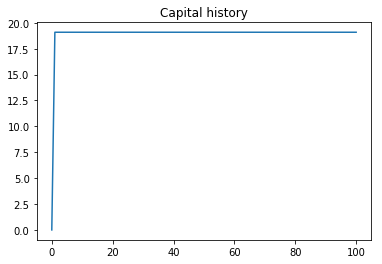

In [32]:
#Simulation

#Import packages
import numpy as np
import matplotlib.pyplot as plt
import timeit
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Set the parameters value
beta=0.988   
theta=.679
delta=.013
kappa=5.24
nu=2
start = timeit.default_timer()

# STEP 1: DISCRETIZE THE STATE SPACE. 
#Get the steady state values. h_ss=0.299
k_ss=((1/(1-theta)*((1/beta)+delta-1))**(-1/theta))*0.299
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 
z=[1.01, 1/1.01] #Shock grid

#STEP 2: Initial guess
#Define a matrix which column vectors are sequential iterations of the value function. 
V = np.empty(shape=[200, 350])
#Guess the initial column vector
V[:,0]=np.zeros((200))


#STEP 3: Feasible return matrix (M).
# Get the grid of all possible combinations of inputs. 
K1,K2 =np.meshgrid(k,k)

# Get the submatrix M for z=1.01
# Feasible combinations
def feasibility0(z1,z2):
    return (z1**(1-theta))*1.01 + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N0 = feasibility0(K1,K2)

# Feasible utility function
def utility0(z1,z2):
    for i in range(100):
        for j in range (100):
                if N0[i,j]>=0:
                    return np.log10(z1**(1-theta)*1.01 + (1-delta)*z1 - z2)
            
#Define the feasible return matrix
M0 = utility0(K1,K2)
M0[np.isnan(M0)] = -1000

# Get the submatrix M for z=0.5/1.01
# Feasible combinations
def feasibility1(z1,z2):
    return ((z1**(1-theta))*(0.2/1.01)) + ((1-delta)*z1) - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N1 = feasibility1(K1,K2)

# Feasible utility function
def utility1(z1,z2):
    for i in range(100):
        for j in range (100):
                if N1[i,j]>=0:
                    return np.log10(z1**(1-theta)*(0.2/1.01) + (1-delta)*z1 - z2)
            
#Define the feasible return matrix
M1 = utility1(K1,K2)
M1[np.isnan(M1)] = -1000

#Now, stack the two submatrixes to get the stochastic return matrix M. 
M= np.vstack((M0,M1))

#STEP 4: VALUE FUNCTION MATRIX ITERATION
#Notice that since the expectation of the shock is 1, the vector V and W are the same. So we can proceed as before. 
X = np.empty(shape=[200,100])
G= np.empty(shape=[200, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(200):
        for j in range(100):
                X[i,j]=M[i,j]+(beta*V[:,s][i])        
    for i in range(0,200):
        V[:,s+1][i]= np.amax(X[i,:]) #Iteration
        G[:,s][i]=np.argmax(X[i,:]) # This line stores the policy function at each iteration. 
    for i in range(0,200):
        if abs(V[:,s+1][i]-V[:,s][i])> epsilon:
            continue
        else:
            count +=1
            break

#Simulate a shock history
shocks=np.random.choice([1.01,(0.2/1.01)],size=100,p=[0.5,0.5])
G=G[:,348]
G_good=G[0:100]
G_bad=G[100:200]
index=np.ones((100))
index[0]=0
for i in range (99): #Get the indexes of capital
    if shocks[i]==1.01:
        index[i+1]=G_good[int(index[i])]
    else:
        index[i+1]=G_bad[int(index[i])]

#Get the history of capitalc
capital=np.empty(100)
for i in range(100):
    capital[i]=k[int(index[i])]
capital 

#History of consumption and output
output=np.empty(100)
for i in range(99):
    output[i]=pow(capital[i],1-theta)

consumption=np.empty(100)
for i in range(99):
    consumption[i]=capital[i]**(1-theta) + (1-delta)*capital[i] - capital[i+1]

#PLOT
plt.figure()
time=np.linspace(0,100,100)
#plt.subplot(131)
plt.plot(time,kapital)
plt.title('Capital history')


Variance of capital: 3.602101723556259
Variance of output: 2.76023179063539
Variance of consumption: 4.483102944596157


Text(0,0.5,'Capital')

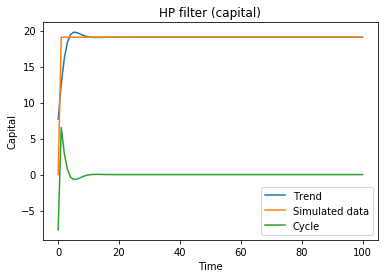

In [33]:
#FILTER
import statsmodels.api as sm
var_kapital=np.var(kapital)
var_output=np.var(output)
var_consumption=np.var(consumption)
print('Variance of capital:',var_kapital )
print('Variance of output:',var_output )
print('Variance of consumption:',var_consumption )
cycle1, trend1 = sm.tsa.filters.hpfilter(kapital, 6.25)
cycle2, trend2 = sm.tsa.filters.hpfilter(output, 6.25)
cycle3, trend3 = sm.tsa.filters.hpfilter(output, 6.25)

plt.figure()
plt.plot(time, trend1, label='Trend')
plt.plot(time,kapital, label='Simulated data')
plt.plot(time,cycle1, label='Cycle')
plt.legend()
plt.title('HP filter (capital)')
plt.xlabel('Time')
plt.ylabel('Capital')

It seems like capital reaches steady state. However, the way the code is written might be the cause of the strange result. 